In [1]:
# !pip install medmnist

In [2]:
# https://github.com/MedMNIST/MedMNIST/blob/main/examples/getting_started.ipynb

In [29]:
%load_ext autoreload
%autoreload 2 #1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import medmnist
from medmnist import INFO, Evaluator
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision
import torch.nn.functional as F

from tqdm import tqdm

# from basic_vae import VariationalAutoencoder
# %aimport basic_vae

In [31]:
data_flag = 'pathmnist'
# data_flag = 'breastmnist'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 128
lr = 0.0001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

pil_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)


Using downloaded and verified file: /home/ruben/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/ruben/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/ruben/.medmnist/pathmnist.npz


In [32]:
train_dataset.imgs.shape

(89996, 28, 28, 3)

In [58]:
train_dataset[0][0].max()

tensor(0.7882)

In [33]:
def plot_latent(autoencoder, data, num_batches=100):
    for i, (x, y) in enumerate(data):
        z = autoencoder.encoder(x.to(device))
        z = z.to('cpu').detach().numpy()
        plt.scatter(z[:, 0], z[:, 1], c=y, cmap='tab10')
        if i > num_batches:
            plt.colorbar()
            break
    plt.show()

In [79]:
def plot_reconstructed(autoencoder, r0=(-5, 10), r1=(-10, 5), n=12, latent_dim=2):
    w = 28
    img = np.zeros((n*w, n*w))
    for i, y in enumerate(np.linspace(*r1, n)):
        for j, x in enumerate(np.linspace(*r0, n)):
            z = torch.randint(-10,10, (1,latent_dims), dtype=torch.float, device=device)
            # z = torch.Tensor([[x, y]]).to(device)
            x_hat = autoencoder.decoder(z)
            # print(z)
            x_hat = x_hat.reshape(3, 28, 28).moveaxix(0,2).to('cpu').detach().numpy()
            img[:,(n-1-i)*w:(n-1-i+1)*w, j*w:(j+1)*w] = x_hat
    plt.imshow(img, extent=[*r0, *r1])
    plt.show()

100%|██████████| 704/704 [00:20<00:00, 34.90it/s]


Iteration: 0 Loss: 20250.08 Diff: 17013.79


100%|██████████| 704/704 [00:19<00:00, 35.59it/s]


Iteration: 1 Loss: 16571.84 Diff: 30784.32


100%|██████████| 704/704 [00:19<00:00, 36.08it/s]


Iteration: 2 Loss: 15750.24 Diff: 43786.83


100%|██████████| 704/704 [00:19<00:00, 35.59it/s]


Iteration: 3 Loss: 15400.61 Diff: 56478.39


100%|██████████| 704/704 [00:19<00:00, 35.78it/s]


Iteration: 4 Loss: 15150.25 Diff: 68970.86


100%|██████████| 704/704 [00:19<00:00, 35.55it/s]


Iteration: 5 Loss: 14974.96 Diff: 81324.24


100%|██████████| 704/704 [00:19<00:00, 35.98it/s]


Iteration: 6 Loss: 14864.78 Diff: 93586.81


100%|██████████| 704/704 [00:19<00:00, 35.56it/s]


Iteration: 7 Loss: 14781.58 Diff: 105786.73


100%|██████████| 704/704 [00:20<00:00, 34.47it/s]


Iteration: 8 Loss: 14708.2 Diff: 117921.1


100%|██████████| 704/704 [00:21<00:00, 33.23it/s]


Iteration: 9 Loss: 14653.94 Diff: 130004.12


100%|██████████| 704/704 [00:20<00:00, 34.02it/s]


Iteration: 10 Loss: 14620.64 Diff: 142050.89


100%|██████████| 704/704 [00:20<00:00, 34.49it/s]


Iteration: 11 Loss: 14594.09 Diff: 154066.38


100%|██████████| 704/704 [00:20<00:00, 33.91it/s]


Iteration: 12 Loss: 14567.22 Diff: 166050.71


100%|██████████| 704/704 [00:20<00:00, 33.93it/s]


Iteration: 13 Loss: 14544.17 Diff: 178008.66


100%|██████████| 704/704 [00:21<00:00, 33.38it/s]


Iteration: 14 Loss: 14531.63 Diff: 189950.63


100%|██████████| 704/704 [00:20<00:00, 33.75it/s]


Iteration: 15 Loss: 14512.83 Diff: 201871.69


100%|██████████| 704/704 [00:21<00:00, 33.04it/s]


Iteration: 16 Loss: 14501.67 Diff: 213777.37


100%|██████████| 704/704 [00:21<00:00, 33.39it/s]


Iteration: 17 Loss: 14513.87 Diff: 225684.95


100%|██████████| 704/704 [00:20<00:00, 33.79it/s]


Iteration: 18 Loss: 14483.05 Diff: 237566.75


100%|██████████| 704/704 [00:21<00:00, 32.43it/s]


Iteration: 19 Loss: 14471.19 Diff: 249434.05


100%|██████████| 704/704 [00:20<00:00, 33.63it/s]


Iteration: 20 Loss: 14464.17 Diff: 261291.39


100%|██████████| 704/704 [00:21<00:00, 33.37it/s]


Iteration: 21 Loss: 14454.24 Diff: 273143.05


100%|██████████| 704/704 [00:21<00:00, 33.24it/s]


Iteration: 22 Loss: 14448.82 Diff: 284985.12


100%|██████████| 704/704 [00:21<00:00, 32.47it/s]


Iteration: 23 Loss: 14440.34 Diff: 296817.42


100%|██████████| 704/704 [00:21<00:00, 32.32it/s]


Iteration: 24 Loss: 14435.71 Diff: 308641.94


100%|██████████| 704/704 [00:20<00:00, 33.63it/s]


Iteration: 25 Loss: 14429.26 Diff: 320460.76


100%|██████████| 704/704 [00:21<00:00, 33.37it/s]


Iteration: 26 Loss: 14423.82 Diff: 332275.05


100%|██████████| 704/704 [00:21<00:00, 32.35it/s]


Iteration: 27 Loss: 14418.05 Diff: 344081.76


100%|██████████| 704/704 [00:21<00:00, 32.53it/s]


Iteration: 28 Loss: 14414.91 Diff: 355885.28


100%|██████████| 704/704 [00:21<00:00, 33.44it/s]


Iteration: 29 Loss: 14408.48 Diff: 367683.15


100%|██████████| 704/704 [00:20<00:00, 33.67it/s]


Iteration: 30 Loss: 14404.56 Diff: 379475.86


100%|██████████| 704/704 [00:21<00:00, 33.07it/s]


Iteration: 31 Loss: 14401.3 Diff: 391268.19


100%|██████████| 704/704 [00:20<00:00, 33.64it/s]


Iteration: 32 Loss: 14397.76 Diff: 403054.6


100%|██████████| 704/704 [00:20<00:00, 34.15it/s]


Iteration: 33 Loss: 14394.73 Diff: 414836.02


100%|██████████| 704/704 [00:21<00:00, 33.14it/s]


Iteration: 34 Loss: 14388.91 Diff: 426614.34


100%|██████████| 704/704 [00:22<00:00, 31.62it/s]


Iteration: 35 Loss: 14388.27 Diff: 438391.01


100%|██████████| 704/704 [00:20<00:00, 33.76it/s]


Iteration: 36 Loss: 14383.95 Diff: 450162.06


100%|██████████| 704/704 [00:21<00:00, 33.23it/s]


Iteration: 37 Loss: 14382.5 Diff: 461932.28


100%|██████████| 704/704 [00:20<00:00, 33.86it/s]


Iteration: 38 Loss: 14378.27 Diff: 473697.41


100%|██████████| 704/704 [00:21<00:00, 32.74it/s]


Iteration: 39 Loss: 14377.51 Diff: 485462.11


100%|██████████| 704/704 [00:21<00:00, 33.16it/s]


Iteration: 40 Loss: 14371.64 Diff: 497220.91


100%|██████████| 704/704 [00:20<00:00, 33.61it/s]


Iteration: 41 Loss: 14368.53 Diff: 508974.66


100%|██████████| 704/704 [00:21<00:00, 32.61it/s]


Iteration: 42 Loss: 14369.13 Diff: 520725.87


100%|██████████| 704/704 [00:21<00:00, 33.01it/s]


Iteration: 43 Loss: 14364.75 Diff: 532472.92


100%|██████████| 704/704 [00:20<00:00, 33.58it/s]


Iteration: 44 Loss: 14358.38 Diff: 544212.77


100%|██████████| 704/704 [00:21<00:00, 33.41it/s]


Iteration: 45 Loss: 14359.26 Diff: 555952.69


100%|██████████| 704/704 [00:21<00:00, 33.06it/s]


Iteration: 46 Loss: 14359.91 Diff: 567689.06


100%|██████████| 704/704 [00:20<00:00, 33.72it/s]


Iteration: 47 Loss: 14352.16 Diff: 579422.43


100%|██████████| 704/704 [00:20<00:00, 33.59it/s]


Iteration: 48 Loss: 14351.49 Diff: 591151.13


100%|██████████| 704/704 [00:21<00:00, 33.32it/s]


Iteration: 49 Loss: 14347.4 Diff: 602877.35


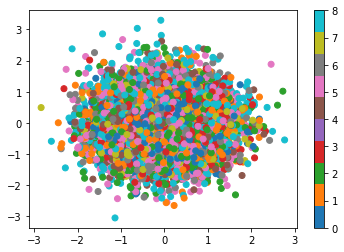

In [153]:
from basic_vae import VariationalAutoencoder

latent_dims = 32 #hyperparameter we can optimze?
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vae = VariationalAutoencoder(latent_dims, mode="beta_vae").to(device) # GPU

vae.train(train_loader, lr=0.0001, epochs=50, device=device)
plot_latent(vae, train_loader)

torch.Size([1, 3, 28, 28])


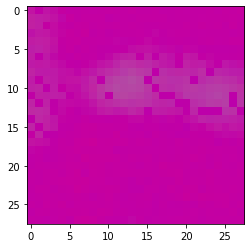

In [164]:
z = torch.randint(-1,1, (1,latent_dims), dtype=torch.float, device=device)
img = vae.decoder.forward(z)
print(img.shape)
img = F.normalize(img)
plt.imshow(img.moveaxis(1, 3).cpu().detach().numpy()[0])
plt.show()

In [169]:
test_img = test_dataset[0][0].to(device)

In [170]:
vae.encoder.forward(test_img)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x784 and 2352x512)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[]

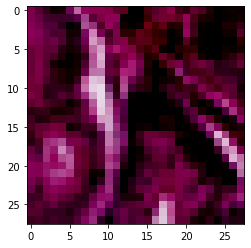

In [157]:
plt.imshow(test_img[0].moveaxis(0, 2).cpu().detach().numpy())
plt.plot()

In [156]:
plot_reconstructed(vae, r0=(-10, 10), r1=(-10, 10), latent_dim=latent_dims)

AttributeError: 'Tensor' object has no attribute 'moveaxix'

# New Section

In [185]:
i = torch.randn((3, 28, 28))
cov1 = nn.Conv2d(3, 6, 3)
cov2 = nn.Conv2d(6, 3, 3)
cov3 = nn.ConvTranspose2d(3,6,3)
cov4 = nn.ConvTranspose2d(6,3,3)
x = cov1(i)
x = cov2(x)
print(x.flatten().shape)
x = cov3(x)
x = cov4(x)
print(x.flatten().shape)


torch.Size([1728])